# Lab 3. SDA (by Alina Kragel)

In [483]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from scipy.linalg import qr
import matplotlib.pyplot as plt
import pylab
import random
import warnings
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [484]:
warnings.filterwarnings('ignore')

## Task 1.

In [485]:
N = 101

In [486]:
def means_for_generation():
    means = stats.uniform(-1, 3.5).rvs(3)
    return means

In [487]:
means = means_for_generation()
print('Means: ' + str(means))

Means: [-0.69485956  1.08385626  1.40736498]


In [488]:
def cov_for_generation():
    cov = []
    for _ in range(3):
        cov.append(stats.uniform(0, 1).rvs(3))
    cov = np.matrix(data = cov)
    cov = (cov + cov.T) / 2
    return cov

In [489]:
cov = cov_for_generation()
print('Covariation matrix: \n' + str(cov))

Covariation matrix: 
[[0.03738445 0.58097501 0.15172687]
 [0.58097501 0.55619031 0.66445705]
 [0.15172687 0.66445705 0.47839065]]


In [490]:
def df_generation(means, cov):
    df = pd.DataFrame(np.random.multivariate_normal(means, cov, N))
    df.rename(columns={0 : 'x1', 1 : 'x2', 2 : 'x3'}, inplace=True)
    return df

In [491]:
df = df_generation(means, cov)
print(df.shape)
df

(101, 3)


,x1,x2,x3
0,-0.415315,1.362619,1.884346
1,-1.579058,0.961648,0.634279
2,-0.942319,0.441274,2.104073
3,-0.741595,-0.151759,1.575504
4,-0.601860,2.022728,1.541142
...,...,...,...
96,-0.480448,1.737885,2.026967
97,-1.788226,-1.034408,0.139006
98,0.088260,0.757649,2.490727
99,-0.881561,0.627416,1.222664


## Task 2.

In [492]:
def select_row(df):
    selected = df.sample(n=1)
    return selected

In [493]:
selected = select_row(df)
selected

,x1,x2,x3
39,-1.147091,0.900345,0.743442


In [494]:
def drop_selected(df, selected):
    df = df.drop(index=selected.index)
    return df

In [495]:
df = drop_selected(df, selected)
print(df.to_string())

           x1        x2        x3
0   -0.415315  1.362619  1.884346
1   -1.579058  0.961648  0.634279
2   -0.942319  0.441274  2.104073
3   -0.741595 -0.151759  1.575504
4   -0.601860  2.022728  1.541142
5   -0.895586  1.482167  0.940830
6   -1.518821  1.253200  0.045910
7    0.045761  1.680837  2.402414
8   -0.762656 -0.188279  1.186713
9   -0.234454  0.878015  1.732175
10  -1.294640  0.527195  0.877136
11  -0.804332  1.705480  1.258162
12   0.137179  0.232306  1.901643
13  -1.217294 -0.014458  1.017788
14  -0.386556  0.068500  0.912314
15  -0.109864  0.959969  2.027603
16  -0.300805  0.748810  1.560269
17  -1.070492 -0.014908  0.976887
18  -1.314857  0.874594  0.916217
19  -1.316016 -0.680232 -0.004257
20   0.547940  0.706234  2.652169
21  -0.717913 -0.216899  1.166882
22  -1.145093  2.550070  1.150980
23  -0.641656  1.711392  1.327456
24  -1.093351  1.191528  0.441541
25  -0.935818  1.955101  0.740954
26  -1.233310  1.609951  0.865940
27  -0.078377  1.985829  1.235270
28   0.436218 

## Task 3.

In [496]:
def linear_regression_model(df, printing):
    model = LinearRegression()

    X = pd.concat([df.x2, df.x3], axis=1)
    y = df.x1
    model.fit(X, y)

    a0 = model.intercept_
    a2 = model.coef_[0]
    a3 = model.coef_[1]
    
    df['x1*'] = a0 + df.x2 * a2 + df.x3 * a3
    df['residuals'] = df.x1 - df['x1*']
    
    if printing is True:
        print('a0: ' + str(a0))
        print('a2: ' + str(a2))
        print('a3: ' + str(a3))
        print('mean of residuals: ' + str(df.residuals.mean()))
        print('variance of residuals: ' + str((df.residuals.var())))
    # df.drop(columns={'x1*', 'residuals'}, inplace=True)
    return model

In [497]:
model = linear_regression_model(df, True)

a0: -1.5190462553231772
a2: -0.13420498840575307
a3: 0.7344789561767257
mean of residuals: 7.549516567451065e-17
variance of residuals: 0.1752342965256365


## Task 4.

In [498]:
def error_square(model, selected):
    x_selected = model.intercept_ + model.coef_[0] * selected.x2 + model.coef_[1]  * selected.x3
    error = (selected.x1.values - x_selected.values)**2
    return error

In [499]:
err = error_square(model, selected)
print('Error square: ' + str(err))

Error square: [0.00283629]


## Task 5.

In [500]:
M = 100

In [501]:
errors = []

for _ in range(M):
    df = df_generation(means, cov)
    selected = select_row(df)
    df = drop_selected(df, selected)
    model = linear_regression_model(df, False)
    err = error_square(model, selected)
    errors.append(err)
mean_error = np.mean(errors)
print('Mean error: ' + str(mean_error))

Mean error: 0.27045987544307565


## Task 6.

## Task 7.

In [502]:
def new_linear_regression_model(df, printing):
    model = LinearRegression(fit_intercept = False)

    X = pd.concat([df.x2, df.x3], axis=1)
    y = df.x1
    model.fit(X, y)

    a2 = model.coef_[0]
    a3 = model.coef_[1]
    
    df['x1*'] = df.x2 * a2 + df.x3 * a3
    df['residuals'] = df.x1 - df['x1*']
    
    if printing is True:
        print('a2: ' + str(a2))
        print('a3: ' + str(a3))
        print('mean of residuals: ' + str(df.residuals.mean()))
        print('variance of residuals: ' + str((df.residuals.var())))
    df.drop(columns={'x1*', 'residuals'}, inplace=True)
    return model

In [503]:
model = new_linear_regression_model(df, True)

a2: -0.0029494745290220893
a3: -0.3592195733206596
mean of residuals: -0.40664375442359124
variance of residuals: 0.6837426217342163


In [504]:
def new_error_square(model, selected):
    x_selected = model.coef_[0] * selected.x2 + model.coef_[1]  * selected.x3
    error = (selected.x1.values - x_selected.values)**2
    return error

In [505]:
errors = []

for _ in range(M):
    df = df_generation(means, cov)
    selected = select_row(df)
    df = drop_selected(df, selected)
    model = new_linear_regression_model(df, False)
    err = new_error_square(model, selected)
    errors.append(err)

mean_error = np.mean(errors)
print('Mean error: ' + str(mean_error))

Mean error: 0.6945196303226225


## Task 8.

In [463]:
means = means_for_generation()
print('Means: ' + str(means))
cov = cov_for_generation()
print('\nCovariation matrix: \n' + str(cov) + '\n')
df = df_generation(means, cov)
print(df.shape)
df

Means: [2.36803407 1.91642174 0.43583963]

Covariation matrix: 
[[0.10893112 0.5076118  0.76165856]
 [0.5076118  0.27483468 0.44476391]
 [0.76165856 0.44476391 0.3185883 ]]

(101, 3)


,x1,x2,x3
0,4.823300,3.105406,2.880438
1,2.856285,2.582418,1.059984
2,2.405578,1.600444,-0.791818
3,1.842237,1.940313,0.940102
4,2.260078,1.715603,-0.067887
...,...,...,...
96,1.819072,1.556738,-0.579431
97,2.437990,2.599024,1.436127
98,3.259044,2.310656,1.710776
99,2.292955,2.023519,0.594516


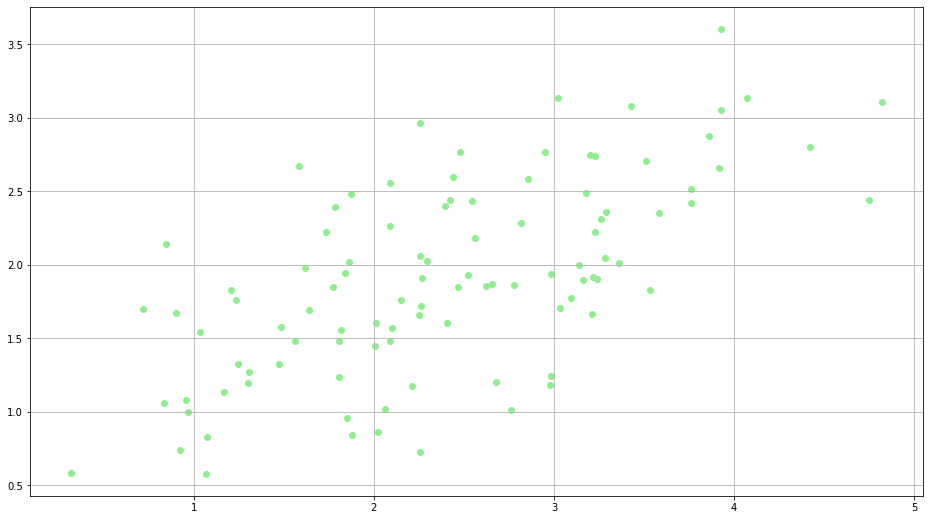

In [464]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.grid()
plt.scatter(df.x1, df.x2, color='lightgreen')
plt.show()

In [465]:
model = LinearRegression()

X = df.x2.values.reshape(-1,1)
y = df.x1
model.fit(X, y)

a0 = model.intercept_
a2 = model.coef_[0]

df['x1*'] = a0 + df.x2 * a2
df['residuals'] = df.x1 - df['x1*']

print('a0: ' + str(a0))
print('a2: ' + str(a2))

a0: 0.6145579566484249
a2: 0.9351636048693874


<AxesSubplot:xlabel='x2', ylabel='x1'>

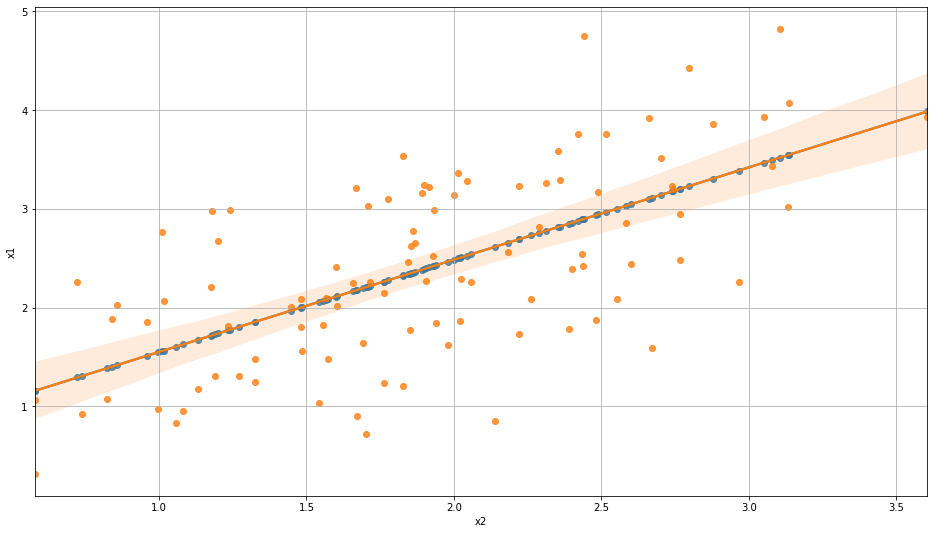

In [466]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.grid()
sb.regplot(ax=ax, x=df.x2, y=df['x1*'])
sb.regplot(ax=ax, x=df.x2, y=df.x1)

## Task 9.

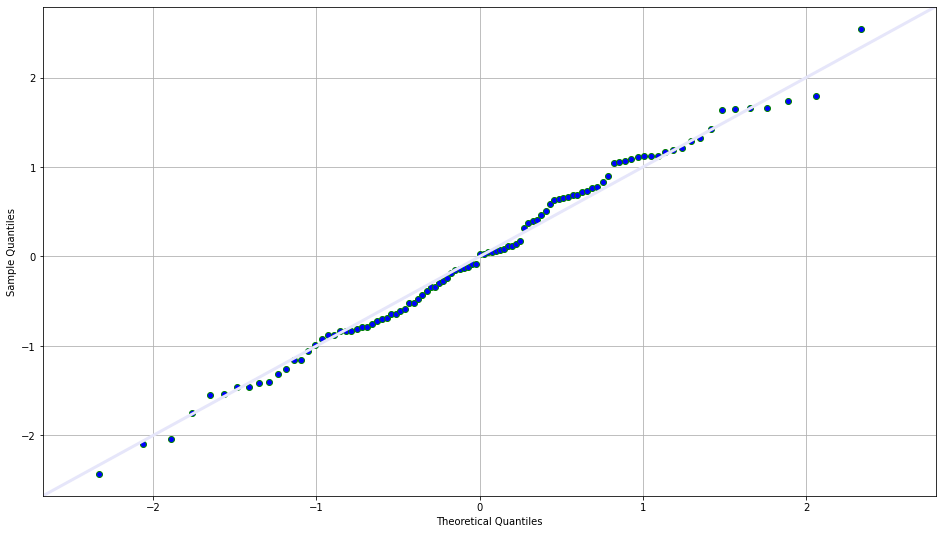

In [467]:
fig, ax = plt.subplots(1, figsize=(16, 9))
sm.qqplot(df.residuals, line ='45', fit=True, color='g',fmt='.g', ax=ax)
ax.grid()
ax.get_lines()[1].set_color("lavender")
ax.get_lines()[1].set_linewidth("3")

## Task 10 - Task 12.

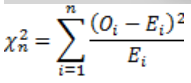

In [468]:
model = linear_regression_model(df, False)
df

,x1,x2,x3,x1*,residuals
0,4.823300,3.105406,2.880438,3.326863,1.496438
1,2.856285,2.582418,1.059984,3.027757,-0.171472
2,2.405578,1.600444,-0.791818,2.243350,0.162228
3,1.842237,1.940313,0.940102,2.359653,-0.517416
4,2.260078,1.715603,-0.067887,2.263256,-0.003179
...,...,...,...,...,...
96,1.819072,1.556738,-0.579431,2.166503,-0.347431
97,2.437990,2.599024,1.436127,2.991973,-0.553983
98,3.259044,2.310656,1.710776,2.645203,0.613842
99,2.292955,2.023519,0.594516,2.497595,-0.204640


In [469]:
def chi_2(data, k):
    mini = np.min(data)
    maxi = np.max(data)
    mean = np.mean(data)
    var = np.var(data)
    binsize = (maxi - mini) / k
    grid = [mini]
    while grid[-1] < maxi:
        grid.append(grid[-1] + binsize)
    empiric_probas = np.array([len(data[np.where((data >= grid[i]) &
                                                 (data < (grid[i+1] if i < k - 1 else grid[i+1] + 0.1)))])
                               for i in range(k)])
    true_probas = np.array([(stats.norm.cdf(grid[i+1] if i < k-1 else np.inf, loc=mean, scale=np.sqrt(var)) -
                     stats.norm.cdf(grid[i] if i > 0 else -np.inf, loc=mean, scale=np.sqrt(var))) * len(data)
                        for i in range(k)])
    statistic = np.sum((empiric_probas - true_probas) ** 2 / true_probas)
    return statistic, stats.chi2.sf(statistic, df = k - 3), stats.chi2.ppf(0.05, k)

In [470]:
bins = []
statistics = []
p_values = []
percentiles = []
comparing = []
for k in range(4, 51):
    res = chi_2(df['residuals'].values, k)
    bins.append(k)
    statistics.append(res[0])
    p_values.append(res[1])
    percentiles.append(res[2])
    comparing.append(True if res[0] < res[2] else False)
results = pd.DataFrame(data={'bins': np.array(bins),
                             'statistic': np.array(statistics),
                             'p-value': np.array(p_values),
                             'persentiles (α = 0.05)': np.array(percentiles),
                             'accept': np.array(comparing)})


results

,bins,statistic,p-value,persentiles (α = 0.05),accept
0,4,0.285168,0.593334,0.710723,True
1,5,1.116351,0.572252,1.145476,True
2,6,2.807807,0.422216,1.635383,False
3,7,1.707008,0.789444,2.167350,True
4,8,4.664368,0.458197,2.732637,False
5,9,4.084022,0.665307,3.325113,False
6,10,4.532409,0.716811,3.940299,False
7,11,7.521324,0.481566,4.574813,False
8,12,4.814766,0.850147,5.226029,True
9,13,10.371886,0.408494,5.891864,False


## Task 13.

In [471]:
M = 100
errors = []

In [472]:
err_3 = []
p = 3

for _ in range(M):
    means = np.array([0, 0])

    cov = []
    for _ in range(2):
        cov.append(stats.uniform(0, 1).rvs(2))
    cov = np.matrix(data = cov)
    cov = (cov + cov.T) / 2

    df = pd.DataFrame(np.random.multivariate_normal(means, cov, N))
    df.rename(columns={0 : 'x1', 1 : 'x2'}, inplace=True)

    sample = df.sample(n=int(0.1 * N))
    df.drop(index=sample.index, inplace=True)

    X_train = df.x2
    y_train = df.x1
    X_test = sample.x2
    Y_test = sample.x1

    model = np.poly1d(np.polyfit(X_train, y_train, p))
    coef = model.coefficients
    a0 = coef[0]
    a1 = coef[1]
    a2 = coef[2]
    a3 = coef[3]

    predicted = a0 + a1 * X_test + a2 * X_test**2 + a3 * X_test**3
    residuals = Y_test - predicted
    err_3.append(np.mean(residuals ** 2))
errors.append(np.mean(err_3))

In [473]:
errors

[1.3365685200434376]

In [474]:
err_4 = []
p = 4

for _ in range(M):
    means = np.array([0, 0])

    cov = []
    for _ in range(2):
        cov.append(stats.uniform(0, 1).rvs(2))
    cov = np.matrix(data = cov)
    cov = (cov + cov.T) / 2

    df = pd.DataFrame(np.random.multivariate_normal(means, cov, N))
    df.rename(columns={0 : 'x1', 1 : 'x2'}, inplace=True)

    sample = df.sample(n=int(0.1 * N))
    df.drop(index=sample.index, inplace=True)

    X_train = df.x2
    y_train = df.x1
    X_test = sample.x2
    Y_test = sample.x1

    model = np.poly1d(np.polyfit(X_train, y_train, p))
    coef = model.coefficients
    a0 = coef[0]
    a1 = coef[1]
    a2 = coef[2]
    a3 = coef[3]
    a4 = coef[4]

    predicted = a0 + a1 * X_test + a2 * X_test**2 + a3 * X_test**3 + a4 * X_test**4
    residuals = Y_test - predicted
    err_4.append(np.mean(residuals ** 2))
errors.append(np.mean(err_4))

In [475]:
errors

[1.3365685200434376, 1.4925702234802092]

In [476]:
err_5 = []
p = 5

for _ in range(M):
    means = np.array([0, 0])

    cov = []
    for _ in range(2):
        cov.append(stats.uniform(0, 1).rvs(2))
    cov = np.matrix(data = cov)
    cov = (cov + cov.T) / 2

    df = pd.DataFrame(np.random.multivariate_normal(means, cov, N))
    df.rename(columns={0 : 'x1', 1 : 'x2'}, inplace=True)

    sample = df.sample(n=int(0.1 * N))
    df.drop(index=sample.index, inplace=True)

    X_train = df.x2
    y_train = df.x1
    X_test = sample.x2
    Y_test = sample.x1

    model = np.poly1d(np.polyfit(X_train, y_train, p))
    coef = model.coefficients
    a0 = coef[0]
    a1 = coef[1]
    a2 = coef[2]
    a3 = coef[3]
    a4 = coef[4]
    a5 = coef[5]

    predicted = a0 + a1 * X_test + a2 * X_test**2 + a3 * X_test**3 + a4 * X_test**4 + a5 * X_test**5
    residuals = Y_test - predicted
    err_4.append(np.mean(residuals ** 2))
errors.append(np.mean(err_4))

In [477]:
errors

[1.3365685200434376, 1.4925702234802092, 6.373911729555816]

## Task 14.

In [480]:
means = np.array([0, 0])

cov = []
for _ in range(2):
    cov.append(stats.uniform(0, 1).rvs(2))
cov = np.matrix(data = cov)
cov = (cov + cov.T) / 2

df = pd.DataFrame(np.random.multivariate_normal(means, cov, N))
df.rename(columns={0 : 'x1', 1 : 'x2'}, inplace=True)

sample = df.sample(n=int(0.1 * N))
df.drop(index=sample.index, inplace=True)

In [481]:
X_train = df.x2
y_train = df.x1

model_3 = np.poly1d(np.polyfit(X_train, y_train, 3))
coef_3 = model_3.coefficients
predicted_3 = a0 = coef_3[0] + coef_3[1] * X_train + coef_3[2] * X_train**2 + coef_3[3] * X_train**3

model_4 = np.poly1d(np.polyfit(X_train, y_train, 4))
coef_4 = model_4.coefficients
predicted_4 = coef_4[0] + coef_4[1] * X_train + coef_4[2] * X_train**2 + coef_4[3] * X_train**3 + coef_4[4] * X_train**4
predicted_4.drop(index=len(predicted_4)-1)

model_5 = np.poly1d(np.polyfit(X_train, y_train, 5))
coef_5 = model_5.coefficients
predicted_5 = coef_5[0] + coef_5[1] * X_train + coef_5[2] * X_train**2 + coef_5[3] * X_train**3 + coef_5[4] * X_train**4 + coef_5[5] * X_train**5
predicted_4.drop(index=len(predicted_5)-1)

0      0.048251
1      0.046781
2      0.048507
3      2.435714
4      0.049131
         ...   
96    -0.636803
97     0.374409
98    -0.064577
99     0.046950
100    0.131515
Name: x2, Length: 90, dtype: float64

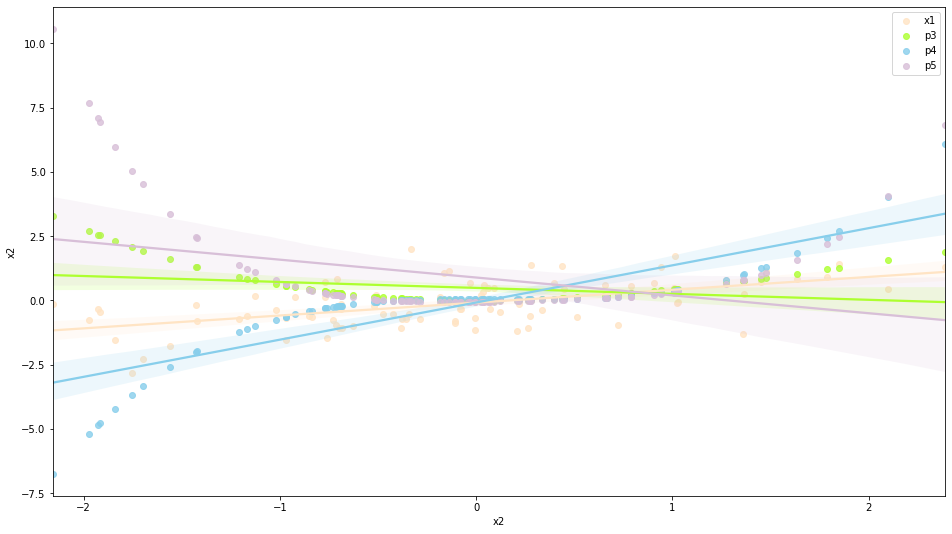

In [482]:
fig, ax = plt.subplots(figsize=(16, 9))
sb.regplot(ax=ax, x=X_train, y=y_train, color='bisque', label='x1')
sb.regplot(ax=ax, x=X_train, y=predicted_3, color='greenyellow', label='p3')
sb.regplot(ax=ax, x=X_train, y=predicted_4, color='skyblue', label='p4')
sb.regplot(ax=ax, x=X_train, y=predicted_5, color='thistle', label='p5')
plt.legend()
plt.show()